In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv("../data/df_final.csv")
weekly = pd.read_csv("../data/semanal.csv")

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   runner               978 non-null    object 
 1   date                 978 non-null    object 
 2   pace_s_km            978 non-null    float64
 3   efficiency           978 non-null    float64
 4   avg_cadence          978 non-null    float64
 5   avg_stride_length_m  978 non-null    float64
 6   time_of_day          978 non-null    object 
 7   time_of_day_int      978 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 61.3+ KB


In [4]:
df_final["date"] = pd.to_datetime(df_final["date"])

In [5]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runner           293 non-null    object 
 1   year_week        293 non-null    object 
 2   km_week          293 non-null    float64
 3   km_prev_week     289 non-null    float64
 4   efficiency       293 non-null    float64
 5   eff_prev         289 non-null    float64
 6   eff_improvement  289 non-null    float64
dtypes: float64(5), object(2)
memory usage: 16.2+ KB


In [6]:
weekly.head()

,runner,year_week,km_week,km_prev_week,efficiency,eff_prev,eff_improvement
0,ari,2024-24,2.82617,NaN,2.656959,NaN,NaN
1,ari,2024-25,9.55316,2.82617,2.964104,2.656959,-0.307145
2,ari,2024-26,20.42635,9.55316,2.704877,2.964104,0.259227
3,ari,2024-27,21.65778,20.42635,2.601768,2.704877,0.103109
4,ari,2024-28,21.70742,21.65778,2.608987,2.601768,-0.007219


In [7]:
weekly["year_week"] = weekly["year_week"].str.replace("-", "").astype(int)
weekly = weekly.sort_values(["runner", "year_week"])

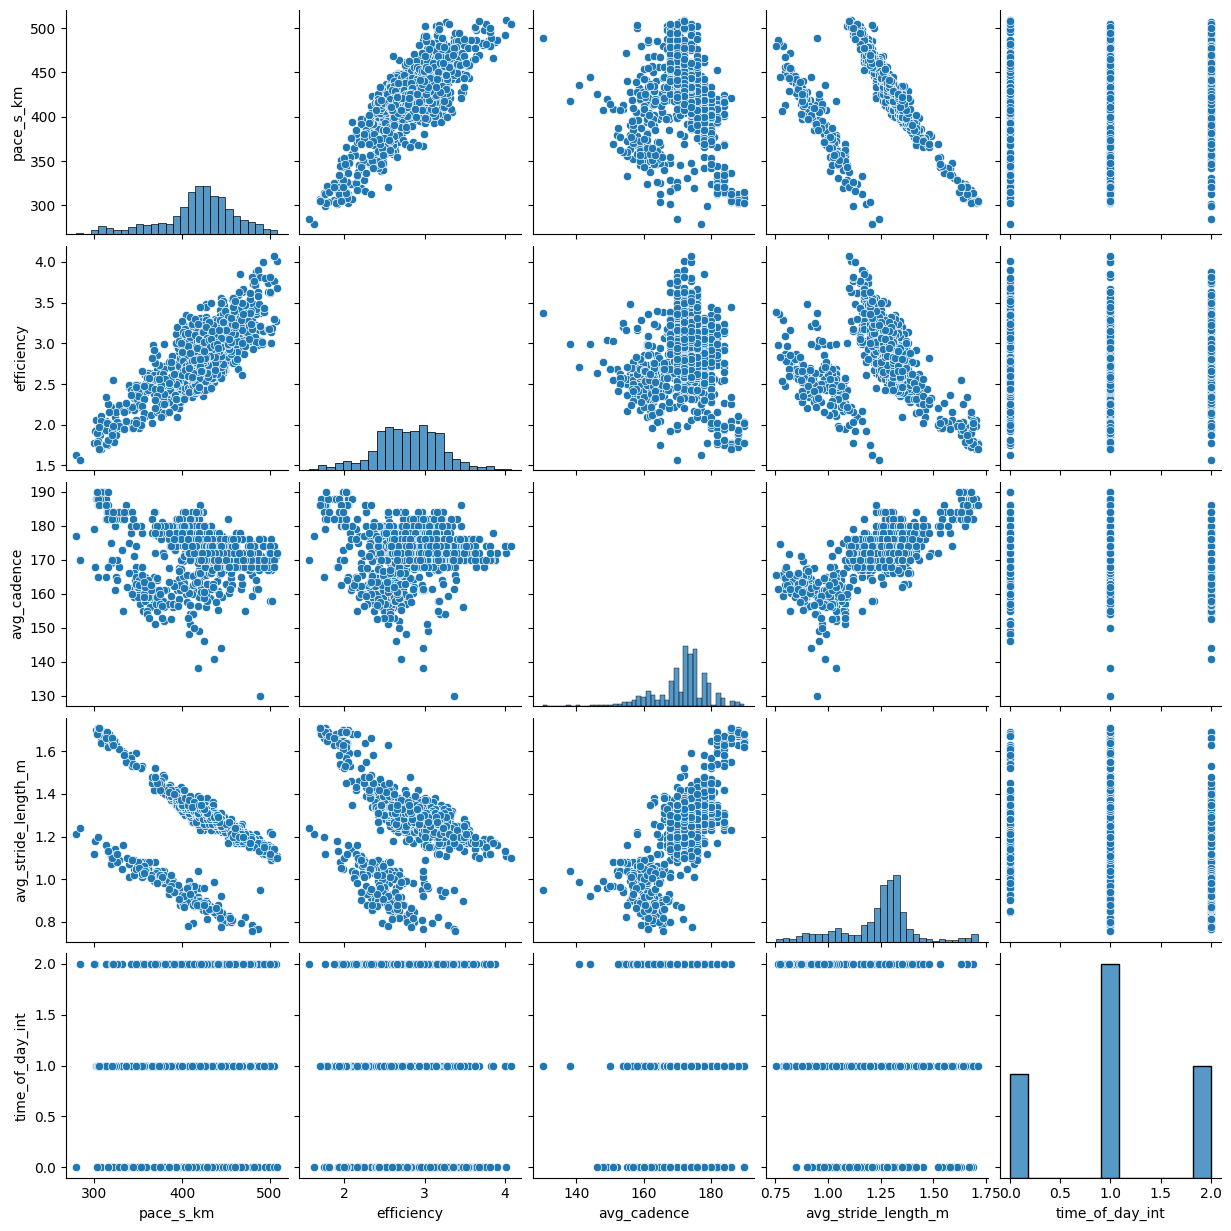

In [8]:
sns.pairplot(df_final)

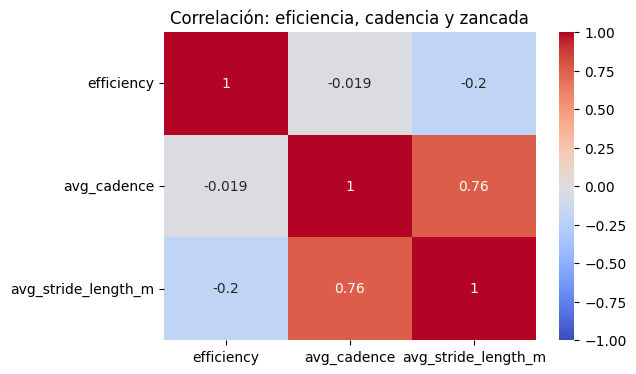

In [9]:
cols = ["efficiency", "avg_cadence", "avg_stride_length_m"]
corr = df_final[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Correlación: eficiencia, cadencia y zancada")
plt.show()

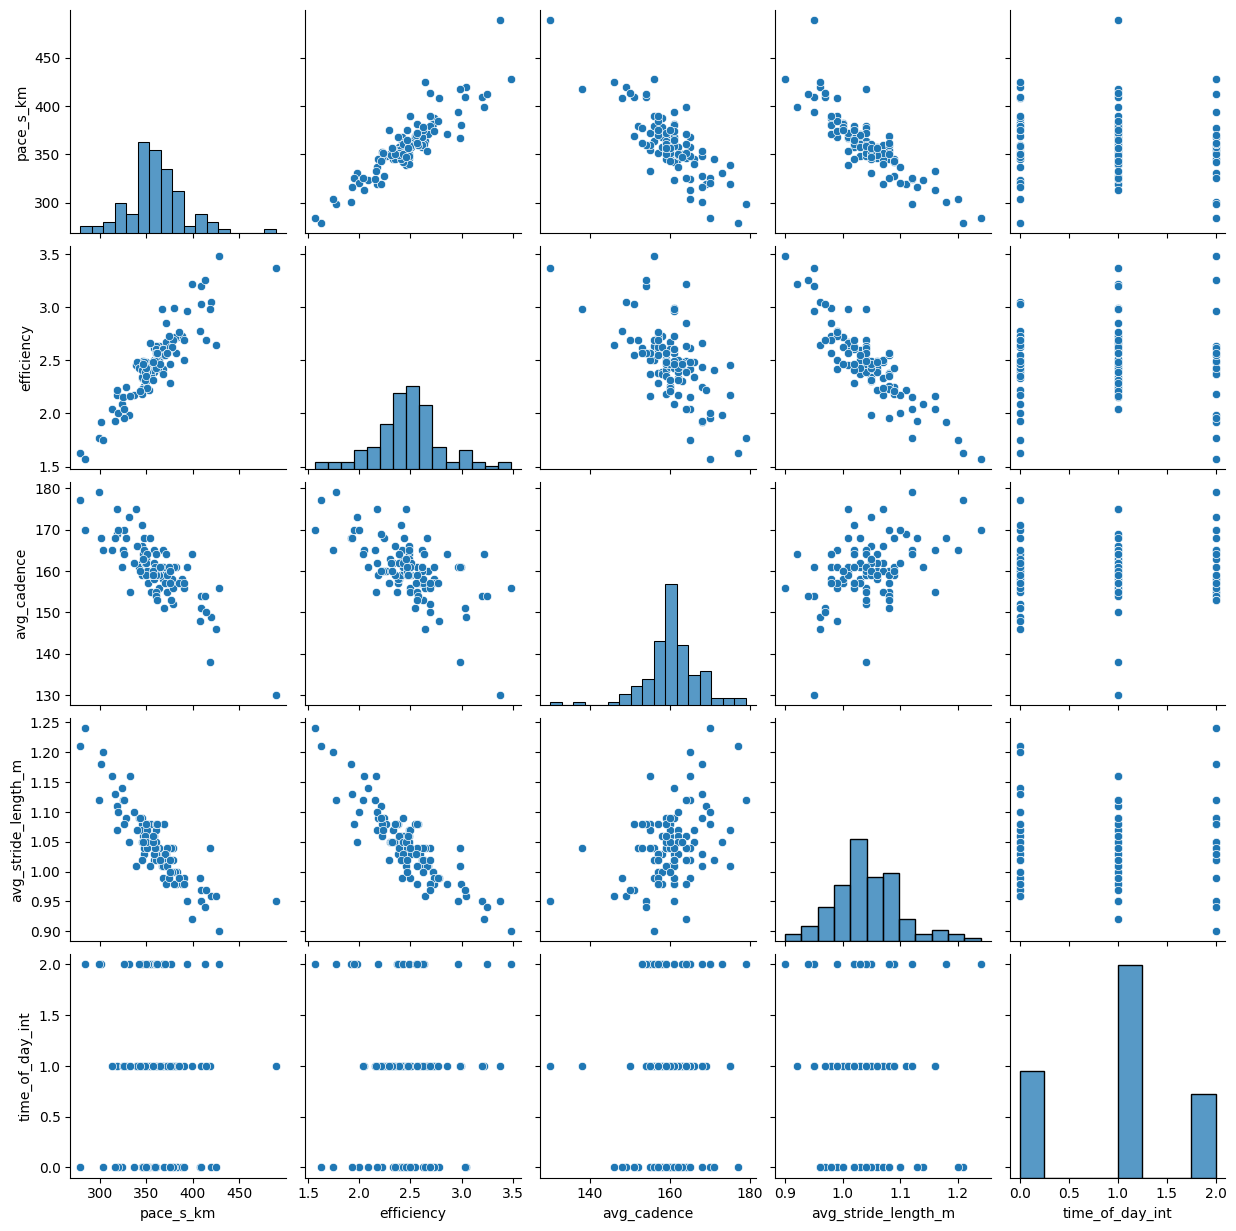

In [10]:
sns.pairplot(df_final[df_final["runner"] == "asier"])

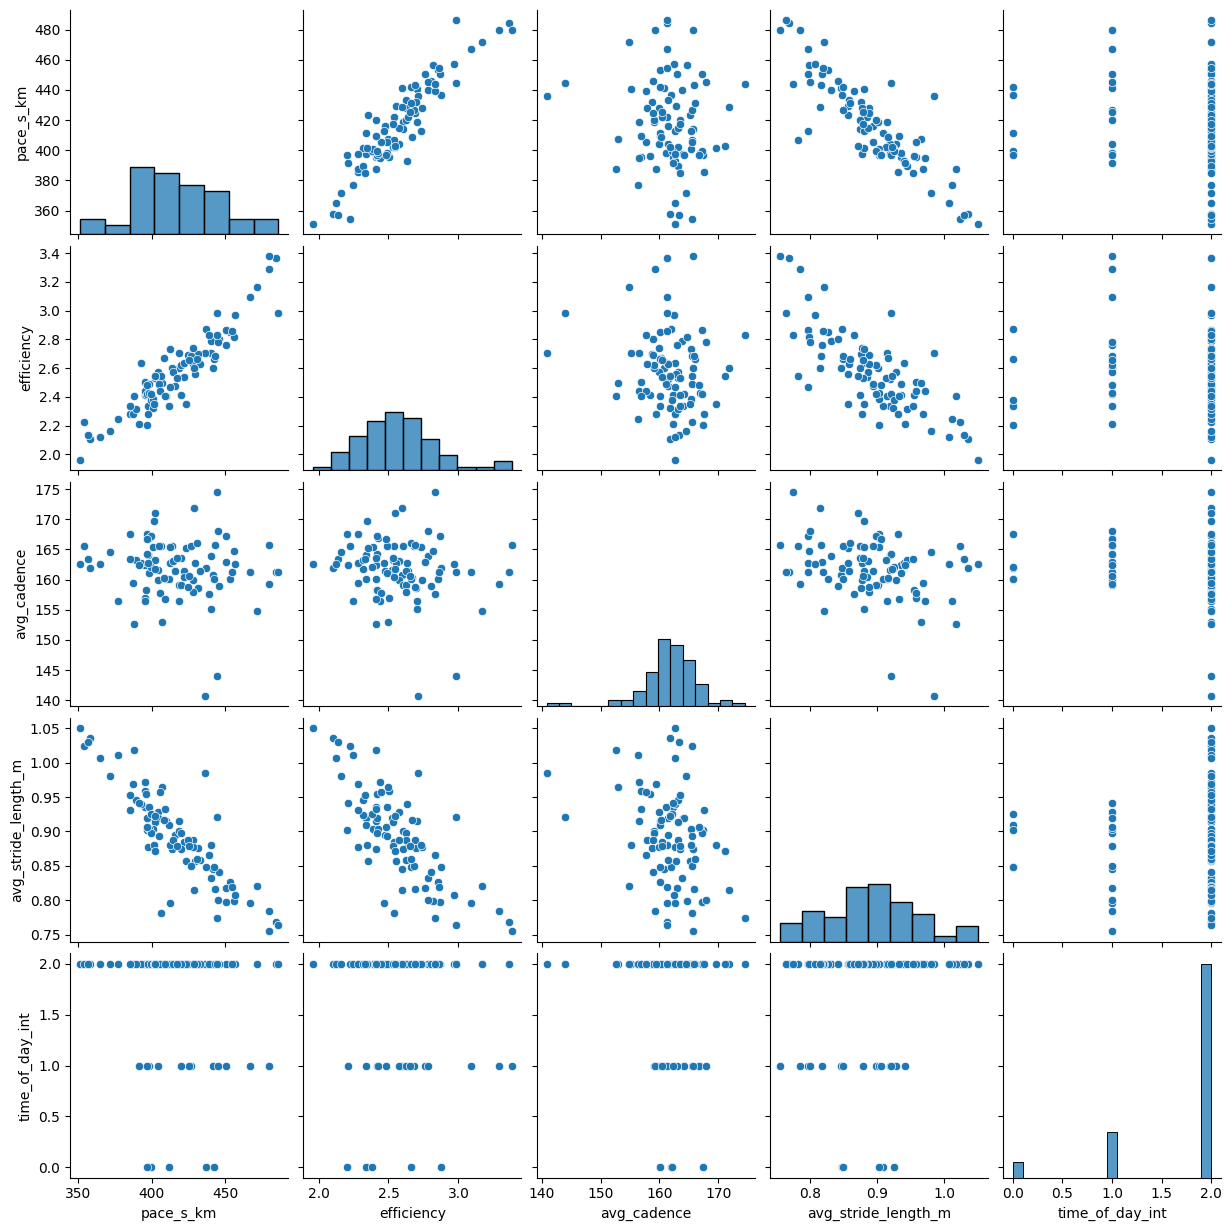

In [11]:
sns.pairplot(df_final[df_final["runner"] == "ari"])

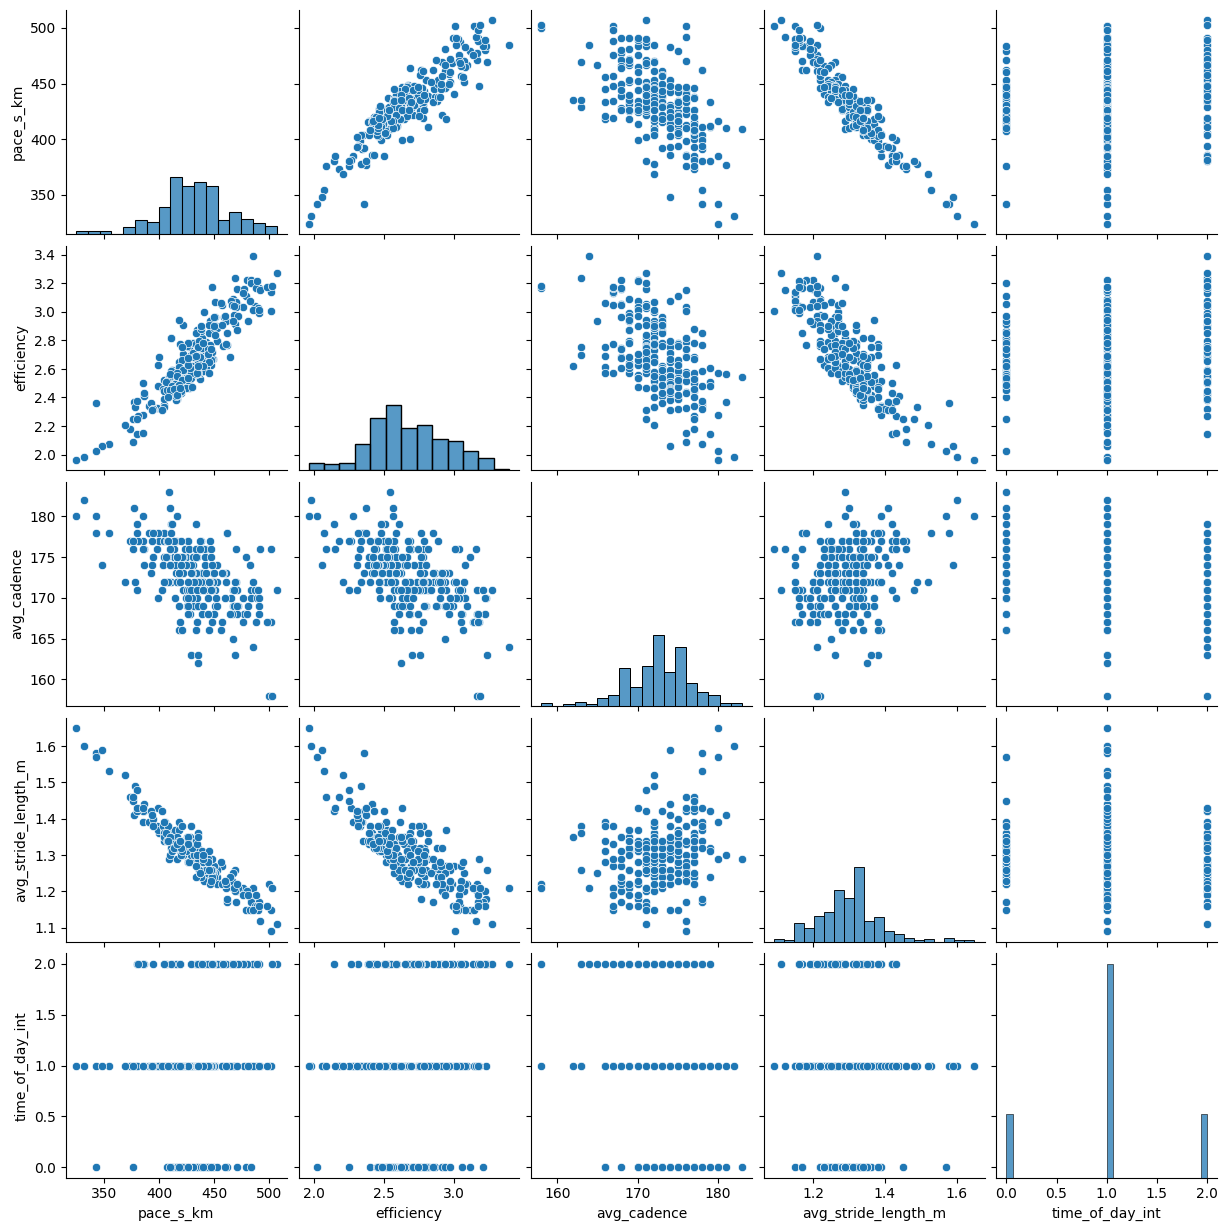

In [12]:
sns.pairplot(df_final[df_final["runner"] == "garmin"])

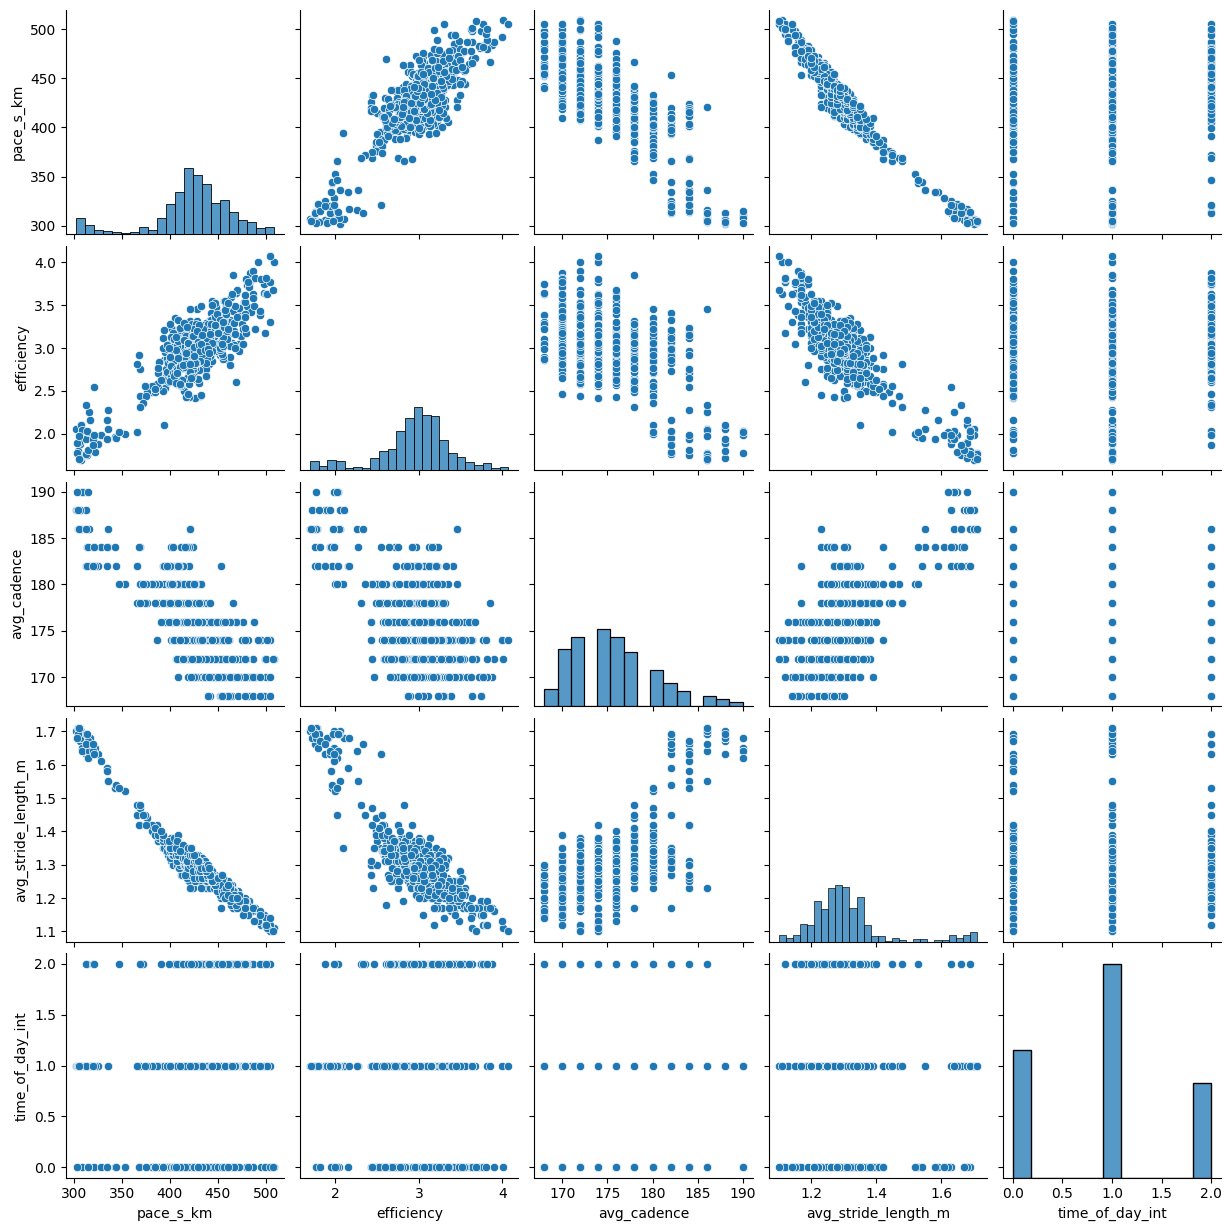

In [13]:
sns.pairplot(df_final[df_final["runner"] == "log"])

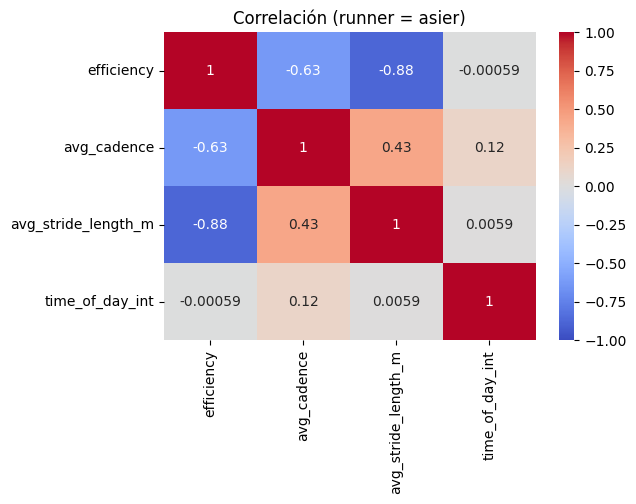

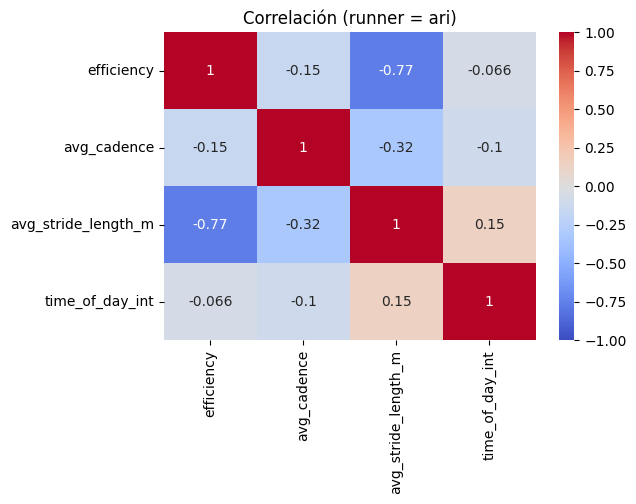

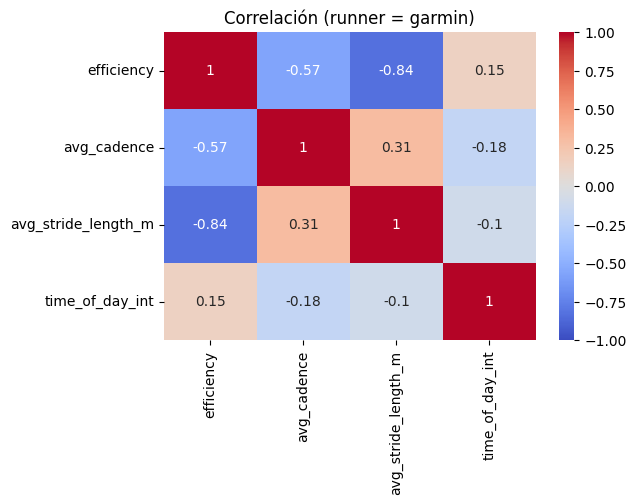

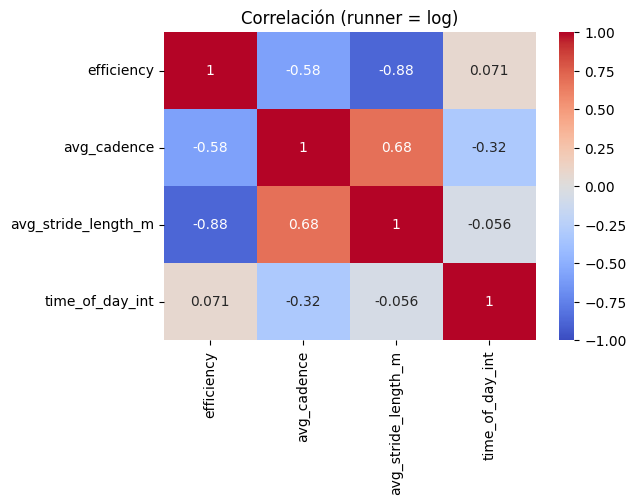

In [14]:
cols = ["efficiency", "avg_cadence", "avg_stride_length_m", "time_of_day_int"]

for r in df_final["runner"].unique():
    df_r = df_final[df_final["runner"] == r]
    corr = df_r[cols].corr()

    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
    plt.title(f"Correlación (runner = {r})")
    plt.show()

# Cadencia VS Eficiencia

In [15]:
df_final.groupby("runner").apply(
    lambda df: df["avg_cadence"].corr(df["efficiency"])
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2574525144.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final.groupby("runner").apply(


runner
ari      -0.149469
asier    -0.625948
garmin   -0.567211
log      -0.579871
dtype: float64

Text(0.5, 1.0, 'Cadencia vs Eficiencia')

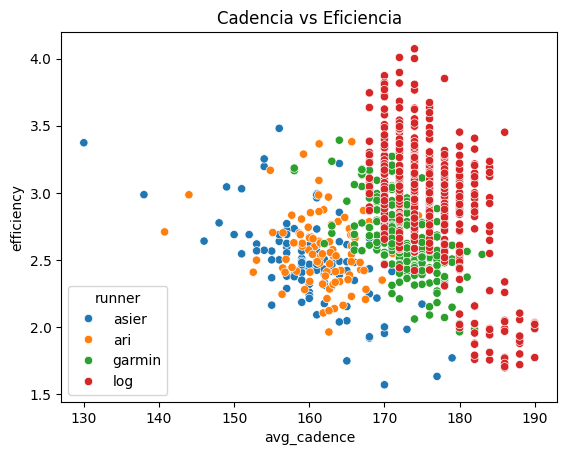

In [16]:
sns.scatterplot(data=df_final, x="avg_cadence", y="efficiency", hue="runner")
plt.title("Cadencia vs Eficiencia")

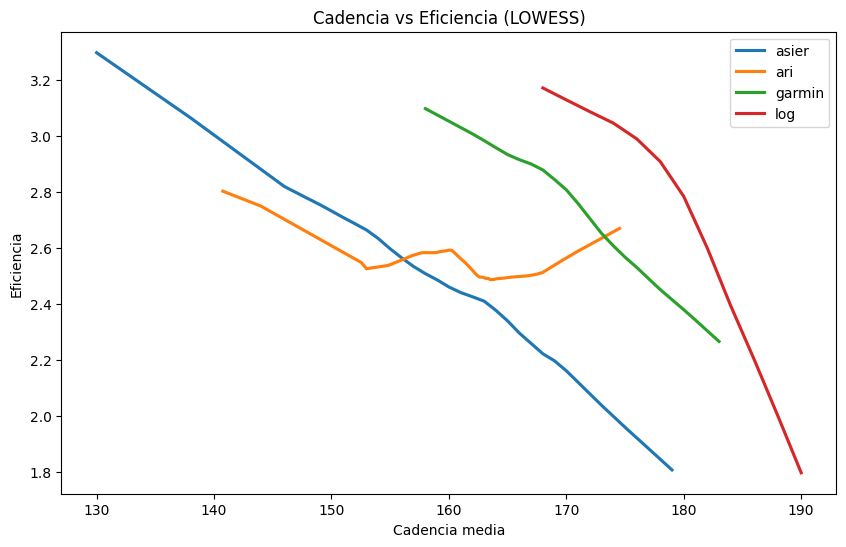

In [17]:
plt.figure(figsize=(10,6))

for r in df_final["runner"].unique():
    df = df_final[df_final["runner"] == r]
    sns.regplot(
        data=df,
        x="avg_cadence",
        y="efficiency",
        lowess=True,
        scatter=False,
        label=r,
    )

plt.title("Cadencia vs Eficiencia (LOWESS)")
plt.xlabel("Cadencia media")
plt.ylabel("Eficiencia")
plt.legend()
plt.show()


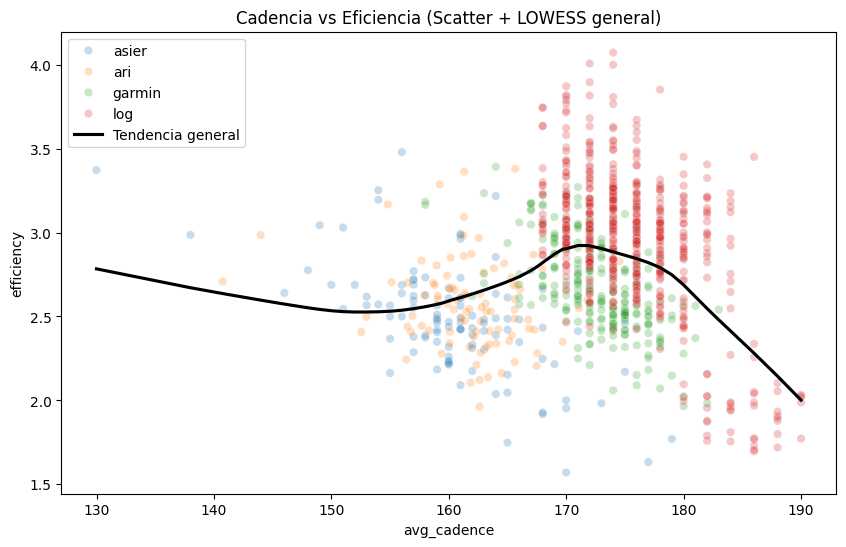

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df_final, x="avg_cadence", y="efficiency", hue="runner", alpha=0.25)

sns.regplot(
    data=df_final,
    x="avg_cadence",
    y="efficiency",
    lowess=True,
    scatter=False,
    color="black",
    label="Tendencia general"
)

plt.title("Cadencia vs Eficiencia (Scatter + LOWESS general)")
plt.legend()
plt.show()


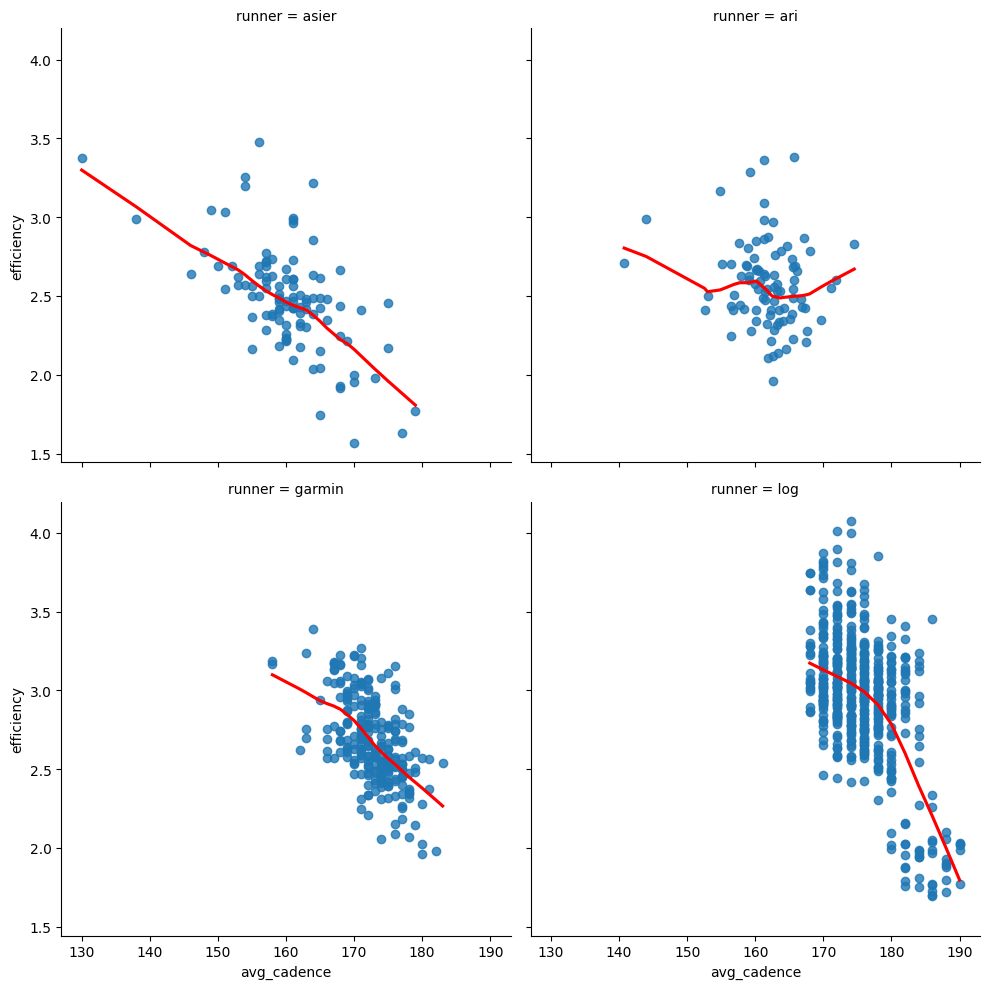

In [19]:
sns.lmplot(data=df_final, x="avg_cadence", y="efficiency", col="runner", col_wrap=2, lowess=True, line_kws={"color":"red"})

# Hora del día VS Eficiencia

In [20]:
df_final[df_final["runner"] == "log"].corr(numeric_only=True)

,pace_s_km,efficiency,avg_cadence,avg_stride_length_m,time_of_day_int
pace_s_km,1.000000,0.862393,-0.802538,-0.971668,0.138149
efficiency,0.862393,1.000000,-0.579871,-0.875969,0.071212
avg_cadence,-0.802538,-0.579871,1.000000,0.684426,-0.317516
avg_stride_length_m,-0.971668,-0.875969,0.684426,1.000000,-0.055896
time_of_day_int,0.138149,0.071212,-0.317516,-0.055896,1.000000


<Axes: xlabel='time_of_day', ylabel='efficiency'>

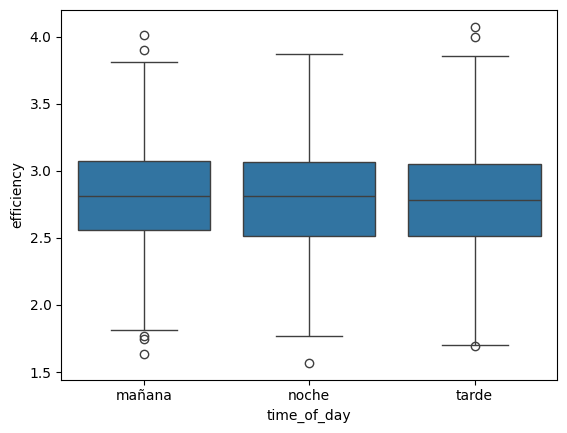

In [21]:
sns.boxplot(data=df_final, x="time_of_day", y="efficiency")

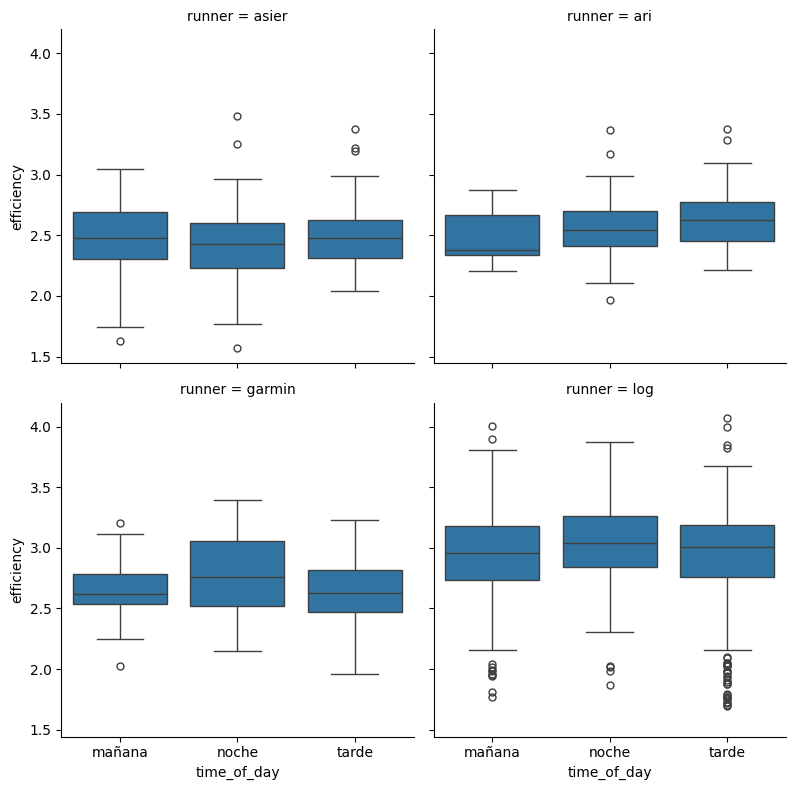

In [22]:
sns.catplot(
    data=df_final,
    x="time_of_day",
    y="efficiency",
    col="runner",
    kind="box",
    col_wrap=2,
    height=4
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\115286745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


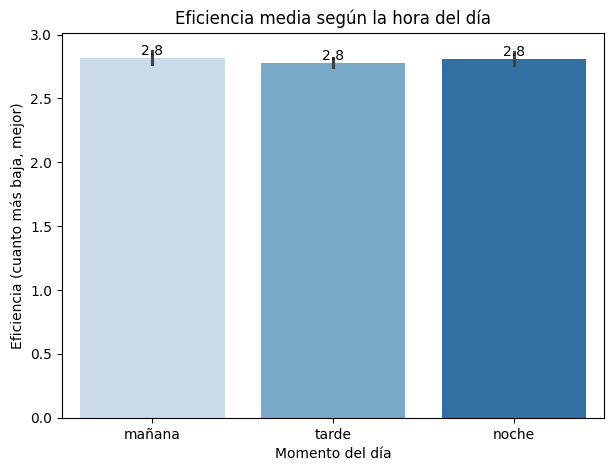

In [23]:
order = ["mañana", "tarde", "noche"]

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=df_final,
    x="time_of_day",
    y="efficiency",
    order=order,
    estimator="mean",
    errorbar=("ci", 95),
    palette="Blues"
)

plt.title("Eficiencia media según la hora del día")
plt.xlabel("Momento del día")
plt.ylabel("Eficiencia (cuanto más baja, mejor)")

# ---- Añadir los valores encima de cada barra ----
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  # 1 decimal; cambia a %.2f si quieres

plt.show()


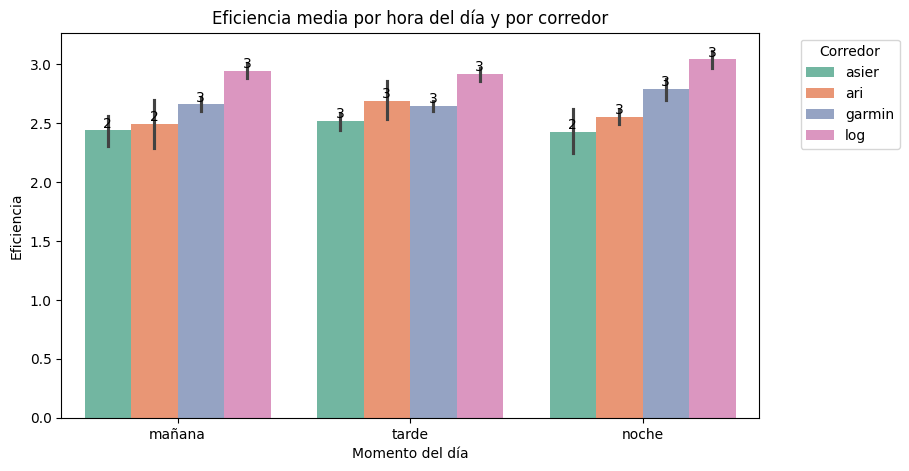

In [24]:
plt.figure(figsize=(9,5))
ax = sns.barplot(
    data=df_final,
    x="time_of_day",
    y="efficiency",
    hue="runner",
    order=order,
    estimator="mean",
    errorbar=("ci", 95),
    palette="Set2"
)

plt.title("Eficiencia media por hora del día y por corredor")
plt.xlabel("Momento del día")
plt.ylabel("Eficiencia")

# ---- Añadir labels ----
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

plt.legend(title="Corredor", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Km acumulados VS Eficiencia

In [25]:
weekly.head()

,runner,year_week,km_week,km_prev_week,efficiency,eff_prev,eff_improvement
0,ari,202424,2.82617,NaN,2.656959,NaN,NaN
1,ari,202425,9.55316,2.82617,2.964104,2.656959,-0.307145
2,ari,202426,20.42635,9.55316,2.704877,2.964104,0.259227
3,ari,202427,21.65778,20.42635,2.601768,2.704877,0.103109
4,ari,202428,21.70742,21.65778,2.608987,2.601768,-0.007219


In [26]:
weekly.corr(numeric_only=True)

,year_week,km_week,km_prev_week,efficiency,eff_prev,eff_improvement
year_week,1.000000,-0.560182,-0.565704,-0.491160,-0.486283,0.020733
km_week,-0.560182,1.000000,0.856579,0.286973,0.372021,0.085876
km_prev_week,-0.565704,0.856579,1.000000,0.341309,0.298801,-0.054797
efficiency,-0.491160,0.286973,0.341309,1.000000,0.580010,-0.478935
eff_prev,-0.486283,0.372021,0.298801,0.580010,1.000000,0.437319
eff_improvement,0.020733,0.085876,-0.054797,-0.478935,0.437319,1.000000


In [27]:
weekly.groupby("runner").apply(
    lambda df: df["km_prev_week"].corr(df["efficiency"])
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\89869329.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly.groupby("runner").apply(


runner
ari      -0.212413
asier     0.153473
garmin    0.320284
log      -0.144132
dtype: float64

In [28]:
weekly.groupby("runner").apply(
    lambda df: df["km_week"].corr(df["efficiency"])
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\1603596379.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly.groupby("runner").apply(


runner
ari      -0.235330
asier    -0.194823
garmin    0.323349
log      -0.220720
dtype: float64

In [29]:
corr_prev = weekly.groupby("runner").apply(
    lambda df: df["km_prev_week"].corr(df["efficiency"])
).reset_index(name="corr_prev")

corr_curr = weekly.groupby("runner").apply(
    lambda df: df["km_week"].corr(df["efficiency"])
).reset_index(name="corr_curr")

corr_df = corr_prev.merge(corr_curr, on="runner")

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\3089114946.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_prev = weekly.groupby("runner").apply(
C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\3089114946.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_curr = weekly.groupby("runner").apply(


In [30]:
corr_long = corr_df.melt(
    id_vars="runner",
    value_vars=["corr_prev", "corr_curr"],
    var_name="tipo",
    value_name="correlacion"
)

# Renombrar para que entienda todo el mundo
map_tipo = {
    "corr_prev": "Km semana anterior",
    "corr_curr": "Km semana actual"
}
corr_long["tipo"] = corr_long["tipo"].map(map_tipo)

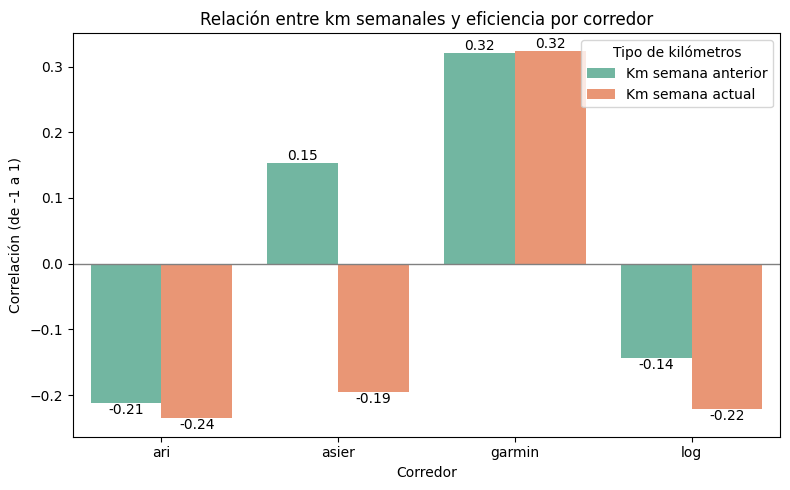

In [31]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=corr_long,
    x="runner",
    y="correlacion",
    hue="tipo",
    palette="Set2"
)

plt.axhline(0, color="grey", linewidth=1)  # línea de referencia
plt.title("Relación entre km semanales y eficiencia por corredor")
plt.xlabel("Corredor")
plt.ylabel("Correlación (de -1 a 1)")
plt.legend(title="Tipo de kilómetros", loc="upper right")

# valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.tight_layout()
plt.show()


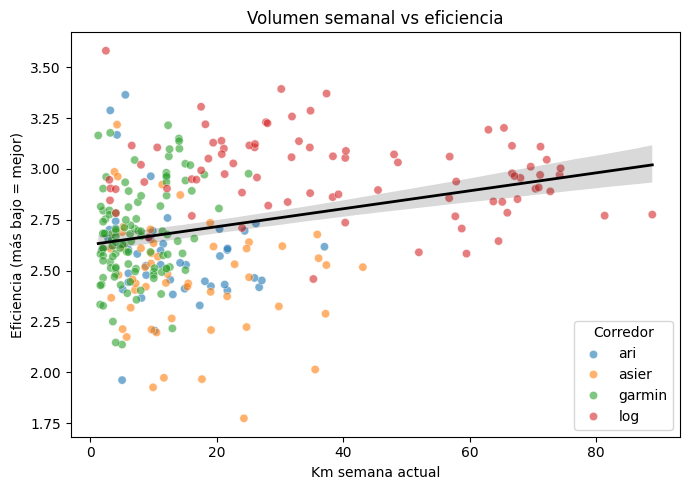

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=weekly,
    x="km_week",
    y="efficiency",
    hue="runner",
    alpha=0.6
)
sns.regplot(
    data=weekly,
    x="km_week",
    y="efficiency",
    scatter=False,
    color="black",
    line_kws={"linewidth":2}
)

plt.title("Volumen semanal vs eficiencia")
plt.xlabel("Km semana actual")
plt.ylabel("Eficiencia (más bajo = mejor)")
plt.legend(title="Corredor")
plt.tight_layout()
plt.show()


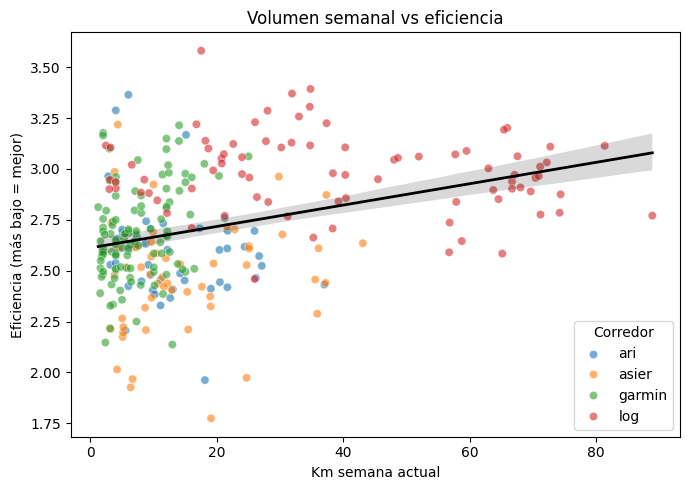

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=weekly,
    x="km_prev_week",
    y="efficiency",
    hue="runner",
    alpha=0.6
)
sns.regplot(
    data=weekly,
    x="km_prev_week",
    y="efficiency",
    scatter=False,
    color="black",
    line_kws={"linewidth":2}
)

plt.title("Volumen semanal vs eficiencia")
plt.xlabel("Km semana actual")
plt.ylabel("Eficiencia (más bajo = mejor)")
plt.legend(title="Corredor")
plt.tight_layout()
plt.show()


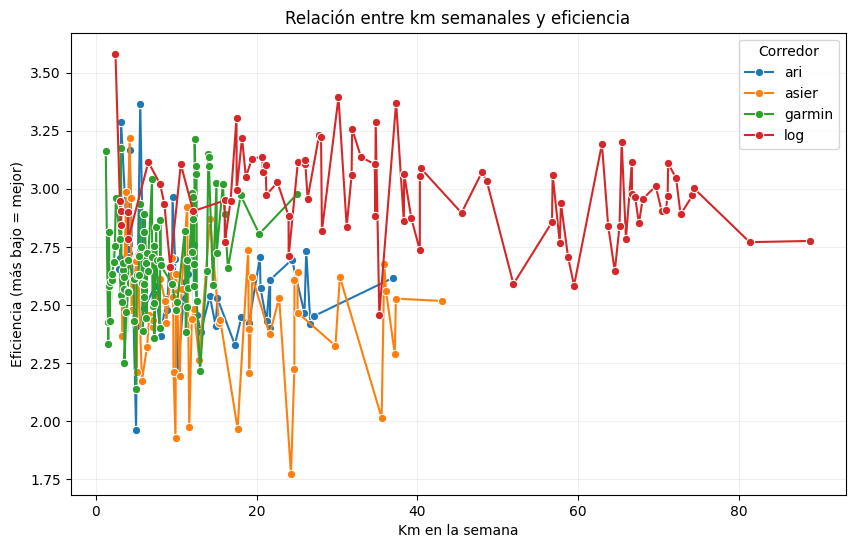

In [34]:
plt.figure(figsize=(10,6))

for r in weekly["runner"].unique():
    df_r = weekly[weekly["runner"] == r].sort_values("km_week")
    sns.lineplot(
        data=df_r,
        x="km_week",
        y="efficiency",
        label=r,
        marker="o"
    )

plt.title("Relación entre km semanales y eficiencia")
plt.xlabel("Km en la semana")
plt.ylabel("Eficiencia (más bajo = mejor)")
plt.legend(title="Corredor")
plt.grid(alpha=0.2)
plt.show()


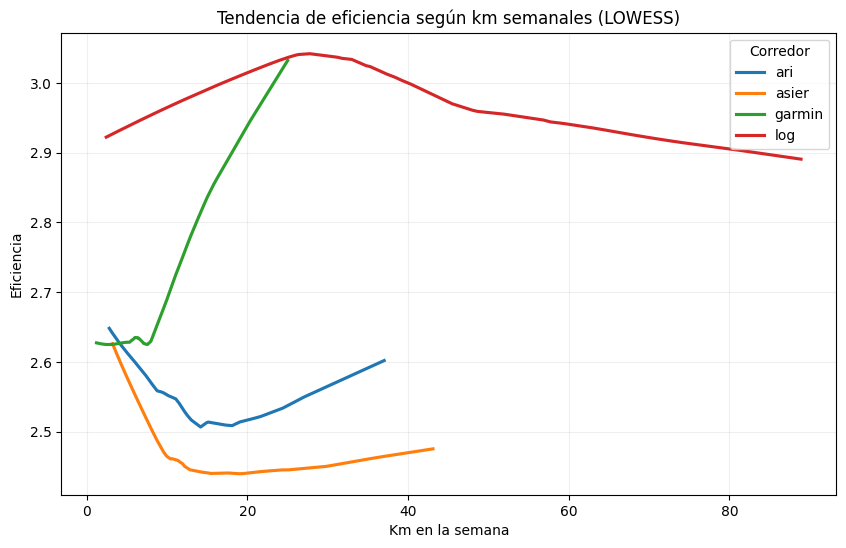

In [35]:
plt.figure(figsize=(10,6))

for r in weekly["runner"].unique():
    df_r = weekly[weekly["runner"] == r].sort_values("km_week")
    sns.regplot(
        data=df_r,
        x="km_week",
        y="efficiency",
        scatter=False,
        lowess=True,
        label=r
    )

plt.title("Tendencia de eficiencia según km semanales (LOWESS)")
plt.xlabel("Km en la semana")
plt.ylabel("Eficiencia")
plt.legend(title="Corredor")
plt.grid(alpha=0.2)
plt.show()

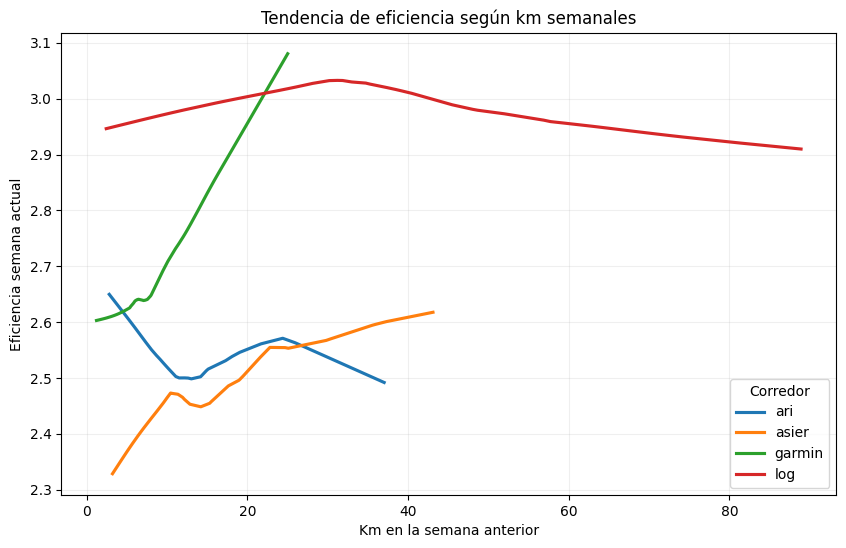

In [36]:
plt.figure(figsize=(10,6))

for r in weekly["runner"].unique():
    df_r = weekly[weekly["runner"] == r].sort_values("km_week")
    sns.regplot(
        data=df_r,
        x="km_prev_week",
        y="efficiency",
        scatter=False,
        lowess=True,
        label=r
    )

plt.title("Tendencia de eficiencia según km semanales")
plt.xlabel("Km en la semana anterior")
plt.ylabel("Eficiencia semana actual")
plt.legend(title="Corredor")
plt.grid(alpha=0.2)
plt.show()

## Longitud de zancada VS Eficiencia

In [37]:
df_final.groupby("runner").apply(
    lambda df: df["avg_stride_length_m"].corr(df["efficiency"])
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2902015289.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final.groupby("runner").apply(


runner
ari      -0.767707
asier    -0.877599
garmin   -0.835737
log      -0.875969
dtype: float64

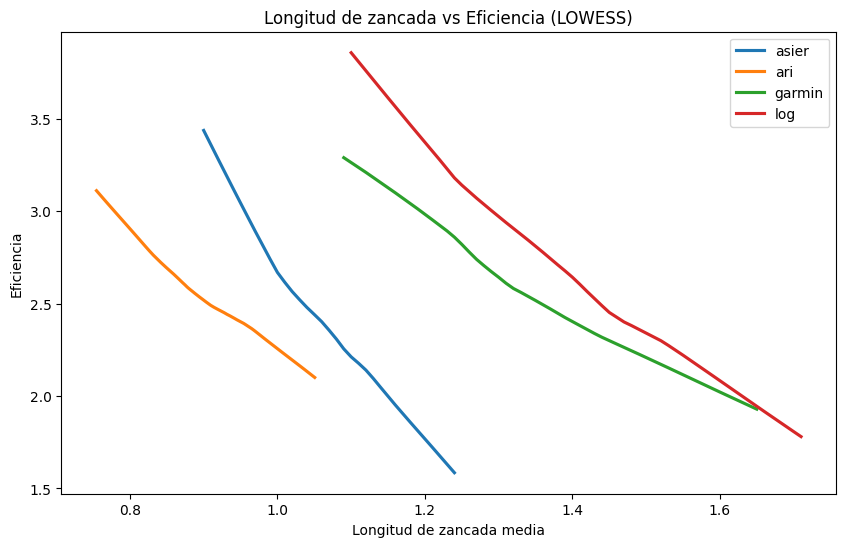

In [38]:
plt.figure(figsize=(10,6))

for r in df_final["runner"].unique():
    df = df_final[df_final["runner"] == r]
    sns.regplot(
        data=df,
        x="avg_stride_length_m",
        y="efficiency",
        lowess=True,
        scatter=False,
        label=r,
    )

plt.title("Longitud de zancada vs Eficiencia (LOWESS)")
plt.xlabel("Longitud de zancada media")
plt.ylabel("Eficiencia")
plt.legend()
plt.show()


## Zancada y Cadencia VS Eficiencia

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2246630974.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


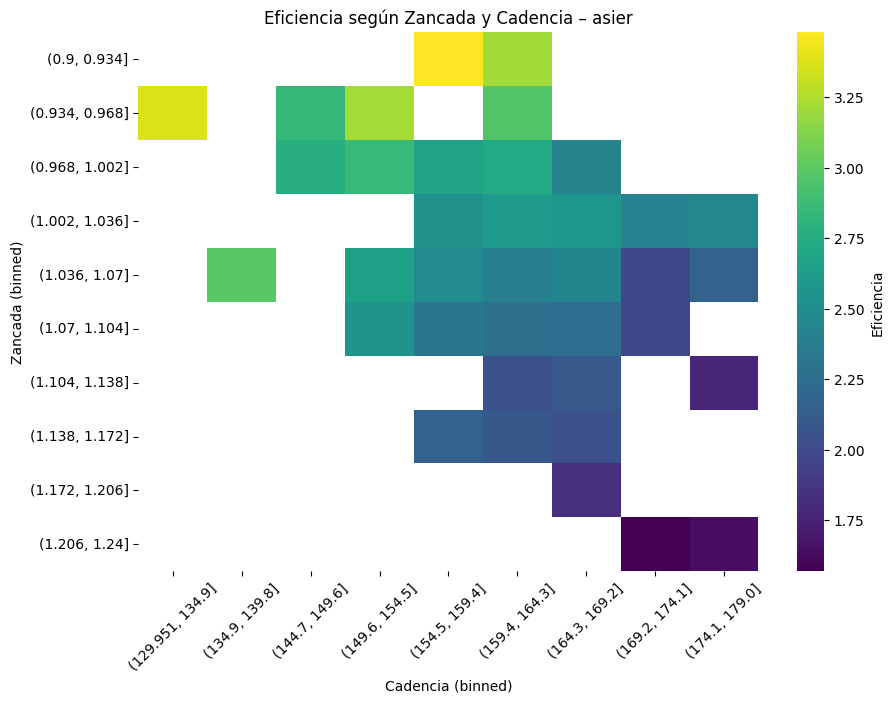

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2246630974.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


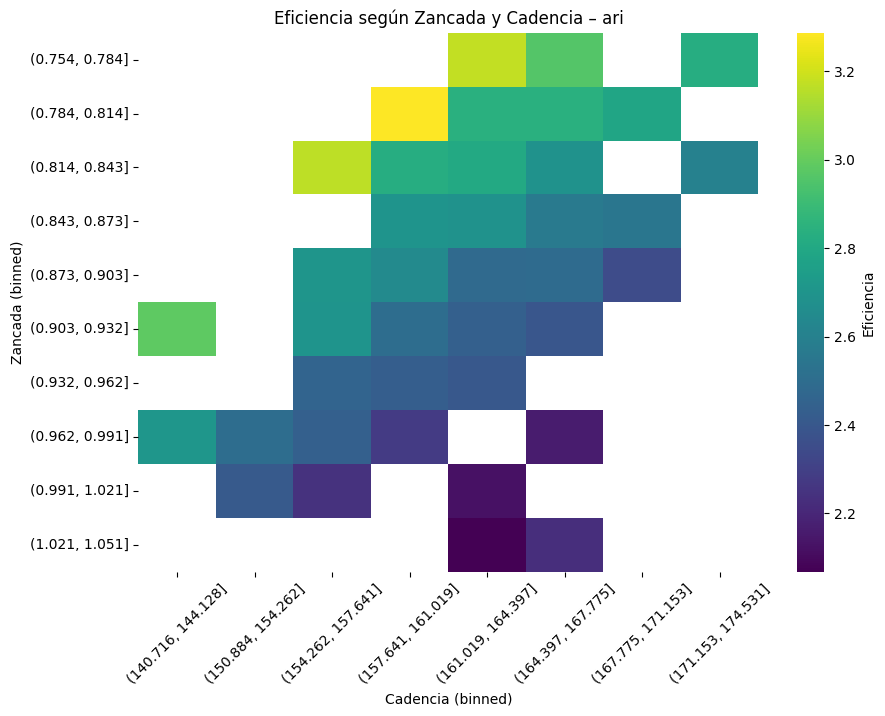

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2246630974.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


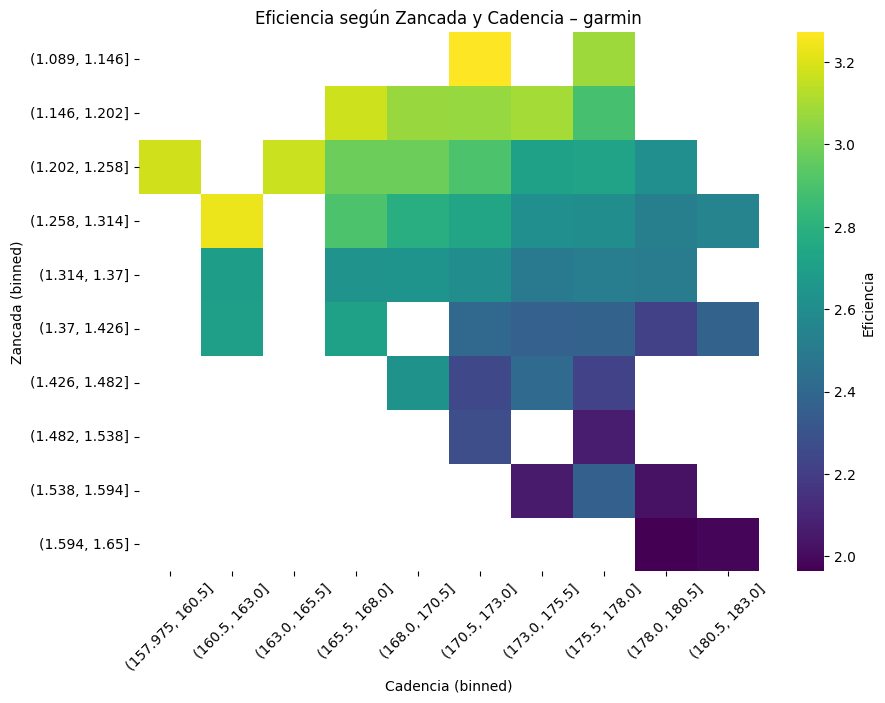

C:\Users\Asier\AppData\Local\Temp\ipykernel_4580\2246630974.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


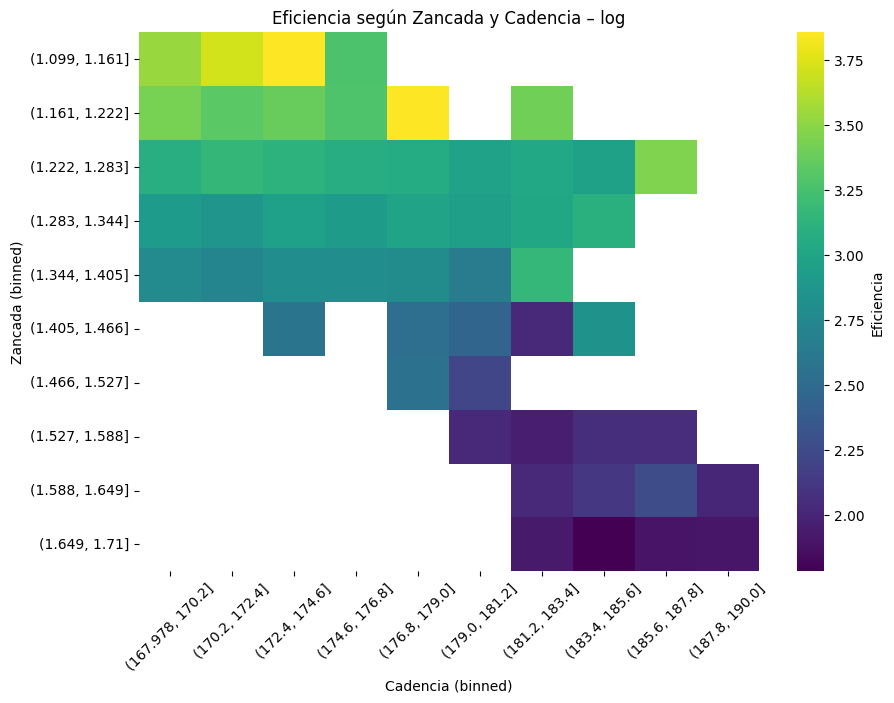

In [39]:
for r in df_final["runner"].unique():
    df = df_final[df_final["runner"] == r].copy()

    # Crear bins (puedes ajustar a 8–12 si quieres más resolución)
    df["cad_bin"] = pd.cut(df["avg_cadence"], bins=10)
    df["stride_bin"] = pd.cut(df["avg_stride_length_m"], bins=10)

    # Tabla pivote: filas = zancada, columnas = cadencia, valores = eficiencia media
    tabla = df.pivot_table(
        index="stride_bin",
        columns="cad_bin",
        values="efficiency",
        aggfunc="mean"
    )

    plt.figure(figsize=(10, 7))
    sns.heatmap(
        tabla,
        cmap="viridis",
        cbar_kws={"label": "Eficiencia"},
    )
    plt.title(f"Eficiencia según Zancada y Cadencia – {r}")
    plt.xlabel("Cadencia (binned)")
    plt.ylabel("Zancada (binned)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()



## Otras cosas

### Cambios en el tiempo

<Axes: xlabel='year_week', ylabel='km_week'>

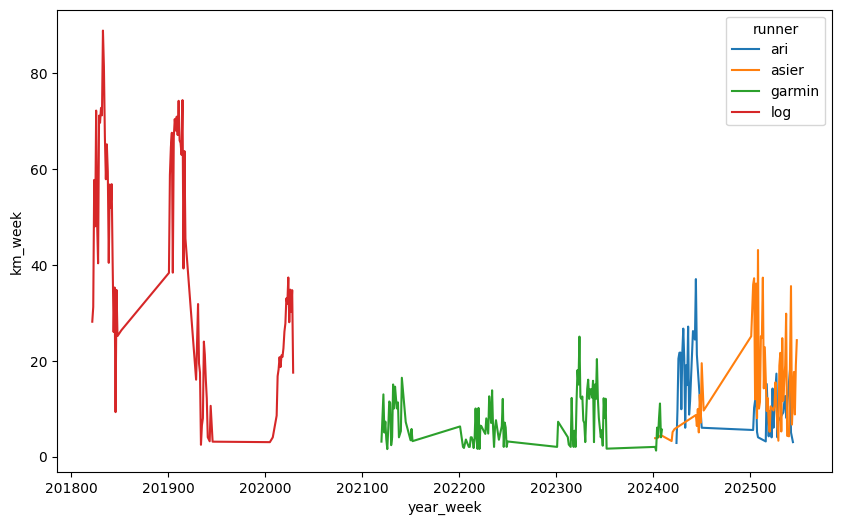

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly, x="year_week", y="km_week", hue="runner")

<Axes: xlabel='year_week', ylabel='efficiency'>

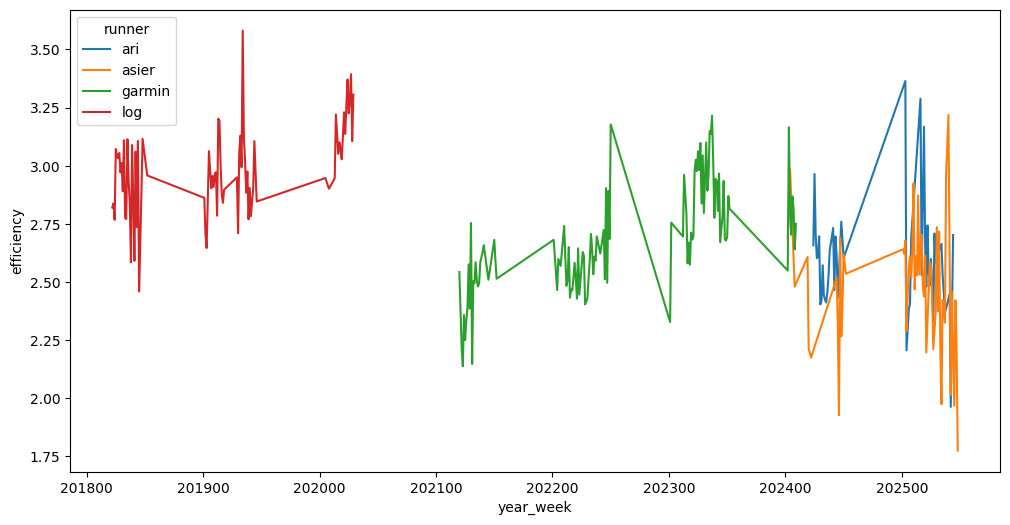

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x="year_week", y="efficiency", hue="runner")

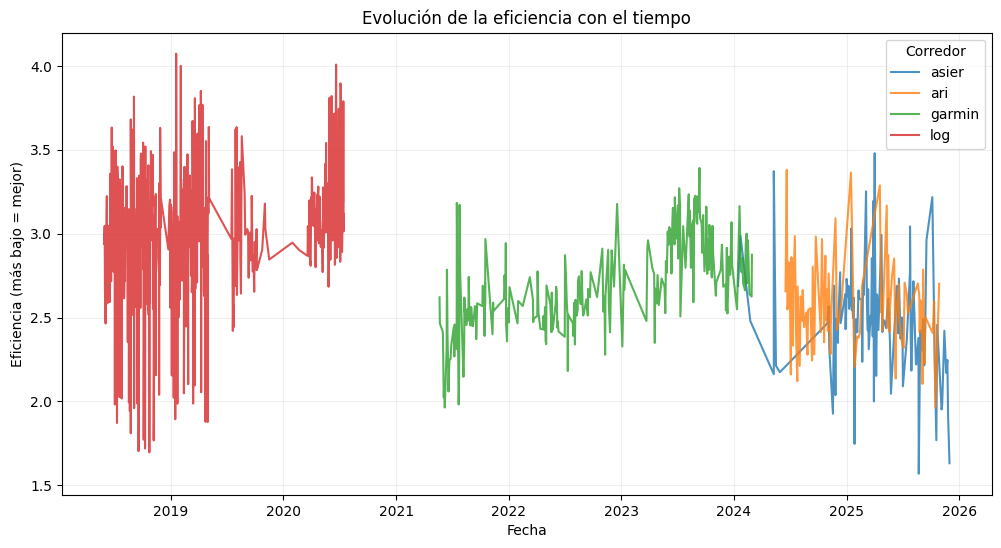

In [42]:
plt.figure(figsize=(12,6))

for r in df_final["runner"].unique():
    df_r = df_final[df_final["runner"] == r].sort_values("date")
    plt.plot(df_r["date"], df_r["efficiency"], label=r, alpha=0.8)

plt.title("Evolución de la eficiencia con el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Eficiencia (más bajo = mejor)")
plt.legend(title="Corredor")
plt.grid(alpha=0.2)
plt.show()


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   runner               978 non-null    object        
 1   date                 978 non-null    datetime64[ns]
 2   pace_s_km            978 non-null    float64       
 3   efficiency           978 non-null    float64       
 4   avg_cadence          978 non-null    float64       
 5   avg_stride_length_m  978 non-null    float64       
 6   time_of_day          978 non-null    object        
 7   time_of_day_int      978 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 61.3+ KB


In [44]:
df_final["date"] = pd.to_datetime(df_final["date"], errors="coerce")
df_final["date_num"] = df_final["date"].map(lambda x: x.toordinal())

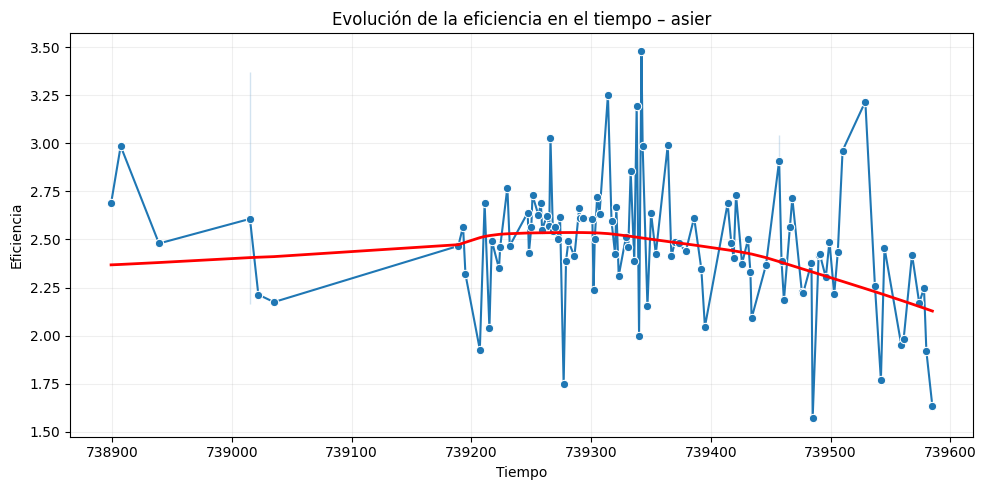

In [45]:
runner_name = "asier"   # cambia esto por "garmin", "log", etc.

df_r = df_final[df_final["runner"] == runner_name].sort_values("date")

plt.figure(figsize=(10,5))

# línea con puntos (evolución real)
sns.lineplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    marker="o"
)

# curva suavizada LOWESS (tendencia)
sns.regplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title(f"Evolución de la eficiencia en el tiempo – {runner_name}")
plt.xlabel("Tiempo")
plt.ylabel("Eficiencia")
plt.grid(alpha=0.2)

# opcional: quitar notación científica del eje X
plt.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()


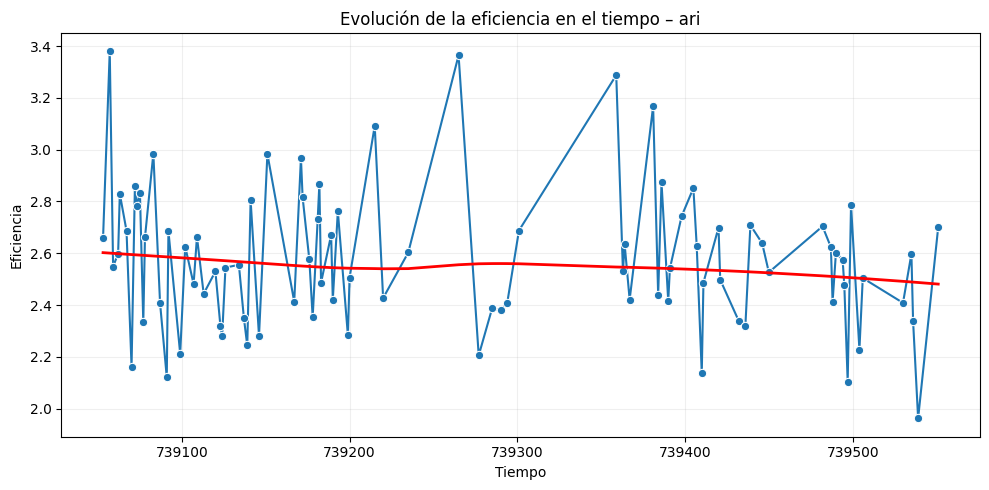

In [46]:
runner_name = "ari"   # cambia esto por "garmin", "log", etc.

df_r = df_final[df_final["runner"] == runner_name].sort_values("date")

plt.figure(figsize=(10,5))

# línea con puntos (evolución real)
sns.lineplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    marker="o"
)

# curva suavizada LOWESS (tendencia)
sns.regplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title(f"Evolución de la eficiencia en el tiempo – {runner_name}")
plt.xlabel("Tiempo")
plt.ylabel("Eficiencia")
plt.grid(alpha=0.2)

# opcional: quitar notación científica del eje X
plt.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()


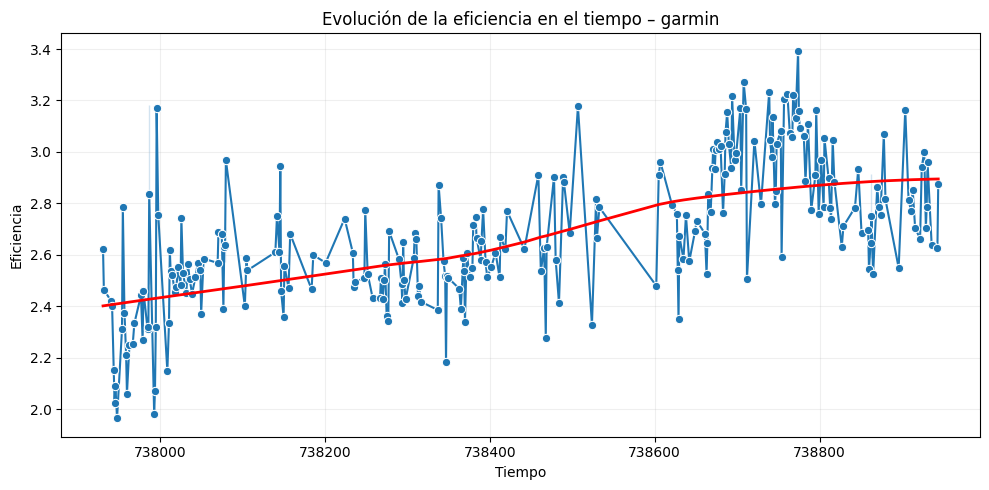

In [47]:
runner_name = "garmin"   # cambia esto por "garmin", "log", etc.

df_r = df_final[df_final["runner"] == runner_name].sort_values("date")

plt.figure(figsize=(10,5))

# línea con puntos (evolución real)
sns.lineplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    marker="o"
)

# curva suavizada LOWESS (tendencia)
sns.regplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title(f"Evolución de la eficiencia en el tiempo – {runner_name}")
plt.xlabel("Tiempo")
plt.ylabel("Eficiencia")
plt.grid(alpha=0.2)

# opcional: quitar notación científica del eje X
plt.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()


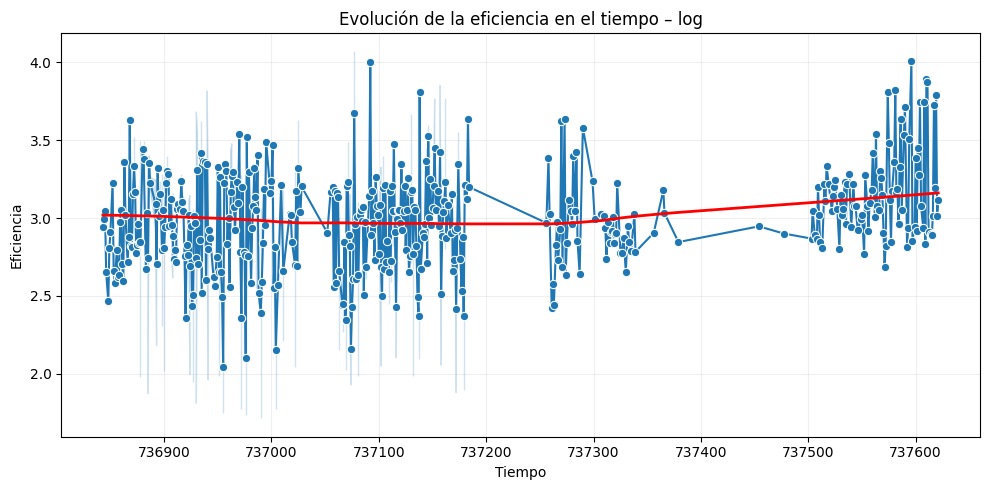

In [48]:
runner_name = "log"   # cambia esto por "garmin", "log", etc.

df_r = df_final[df_final["runner"] == runner_name].sort_values("date")

plt.figure(figsize=(10,5))

# línea con puntos (evolución real)
sns.lineplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    marker="o"
)

# curva suavizada LOWESS (tendencia)
sns.regplot(
    data=df_r,
    x="date_num",
    y="efficiency",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title(f"Evolución de la eficiencia en el tiempo – {runner_name}")
plt.xlabel("Tiempo")
plt.ylabel("Eficiencia")
plt.grid(alpha=0.2)

# opcional: quitar notación científica del eje X
plt.ticklabel_format(style="plain", axis="x")

plt.tight_layout()
plt.show()